In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [231]:
## All data provided by FBRef

In [220]:
## Creating the table for the shooting stats

sht_link = "https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats"
sht_data = pd.read_html(sht_link)

df_shooting = sht_data[0]

df_shooting.columns = df_shooting.columns.droplevel(0)

df_shooting_data = df_shooting[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', '90s', 'Gls', 'Sh']]

In [221]:
## Creating the table for the shot creating actions

cre_link = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
cre_data = pd.read_html(cre_link)

df_creation = cre_data[0]

df_creation.columns = df_creation.columns.droplevel(0)

df_creation_data = df_creation[['SCA', 'SCA90']]

In [222]:
## Creating the universal table with data from both

df = pd.concat([df_shooting_data, df_creation_data], axis=1)

In [223]:
## Editing the table, converting value types and preparing the data for the visualisation

df = df[df['Player'].notna()]
df = df[df['Player'] != 'Player']
df = df.dropna()

df['Player'] = df['Player'].astype("string")
df['Nation'] = df['Nation'].astype("string")
df['Pos'] = df['Pos'].astype("string")
df['Squad'] = df['Squad'].astype("string")
df['Comp'] = df['Comp'].astype("string")
df['Age'] = df['Age'].astype("string")

df['90s'] = df['90s'].astype(float)
df['Gls'] = df['Gls'].astype(int)
df['Sh'] = df['Sh'].astype(int)
df['SCA'] = df['SCA'].astype(int) 
df['SCA90'] = df['SCA90'].astype(float) 

df['Gls90'] = round(df['Gls'] / df['90s'], 2)
df['Sht90'] = round(df['Sh'] / df['90s'], 2)

df = df.loc[df['90s'] > df['90s'].mean()]

df = df.reset_index(drop = True)

In [224]:
## Separating the table to each individual league

df_eng = df.loc[df['Comp'] == "eng Premier League"]
df_eng = df_eng.reset_index(drop=True)

df_ita = df.loc[df['Comp'] == "it Serie A"]
df_ita = df_ita.reset_index(drop=True)

df_fra = df.loc[df['Comp'] == "fr Ligue 1"]
df_fra = df_fra.reset_index(drop=True)

df_esp = df.loc[df['Comp'] == "es La Liga"]
df_esp = df_esp.reset_index(drop=True)

df_ger = df.loc[df['Comp'] == "de Bundesliga"]
df_ger = df_ger.reset_index(drop=True)

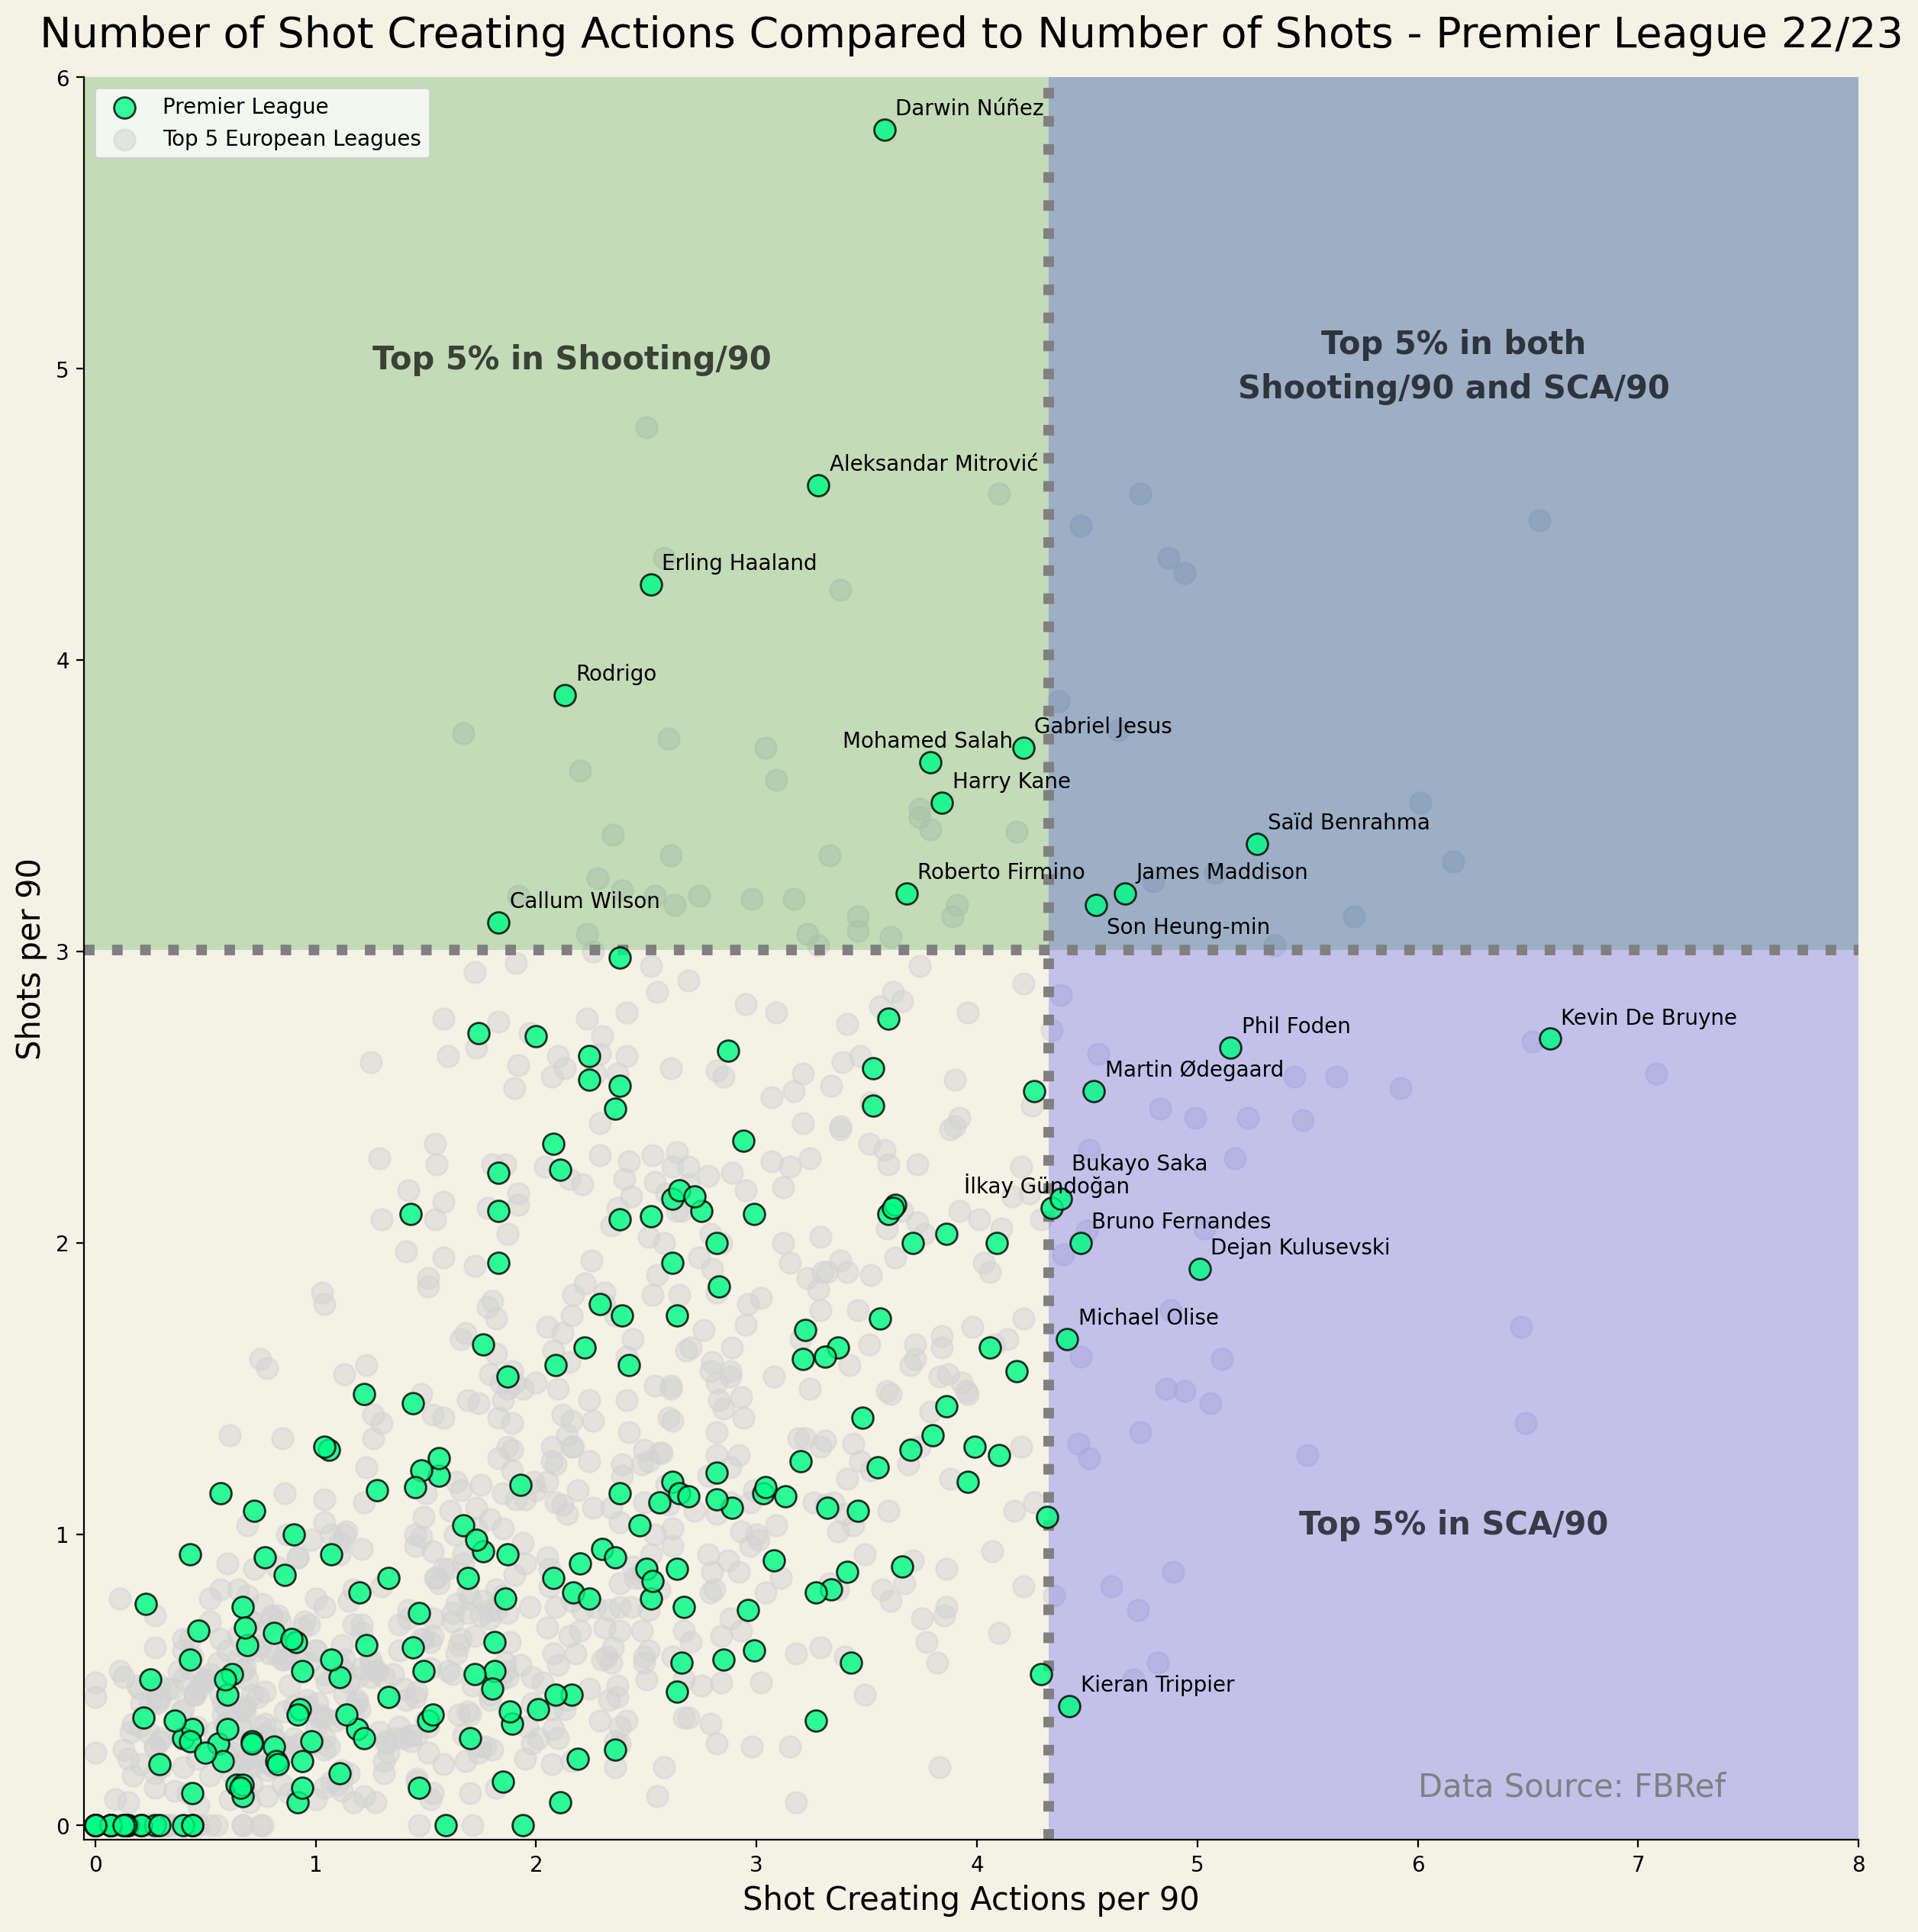

In [239]:
## Premier League

plt.figure(figsize = (15,15), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim([-0.05, 6])
plt.xlim([-0.05, 8])

plt.title("Number of Shot Creating Actions Compared to Number of Shots - Premier League 22/23", fontsize = 20, y = 1.01) 

ax.set_xlabel("Shot Creating Actions per 90", fontsize = 15)
ax.set_ylabel("Shots per 90", fontsize = 15)

ax.scatter(df_eng['SCA90'], df_eng['Sht90'], s = 100, c = "#00ff85", ec = "black", alpha = 0.8, label = "Premier League", zorder=3)
ax.scatter(df['SCA90'], df['Sht90'], s = 100, c = "lightgrey", alpha = 0.5, label = "Top 5 European Leagues")

ax.axvline(df_eng['SCA90'].quantile(0.95), ls=":", linewidth=5, color="grey")
ax.axhline(df_eng['Sht90'].quantile(0.95), ls=":", linewidth=5, color="grey")

ax.axhspan(df_eng['Sht90'].quantile(0.95), 6, facecolor='green', alpha=0.2)
ax.axvspan(df_eng['SCA90'].quantile(0.95), 8, facecolor="blue", alpha=0.2)

for i in range(len(df_eng)):
    if df_eng['Player'][i] == "Mohamed Salah":
        ax.text(df_eng['SCA90'][i] - 0.40, df_eng['Sht90'][i] + 0.05, df_eng['Player'][i])
    elif df_eng['Player'][i] == "İlkay Gündoğan":
        ax.text(df_eng['SCA90'][i] - 0.40, df_eng['Sht90'][i] + 0.05, df_eng['Player'][i])
    elif df_eng['Player'][i] == "Son Heung-min":
        ax.text(df_eng['SCA90'][i] + 0.05, df_eng['Sht90'][i] - 0.10, df_eng['Player'][i])
    elif df_eng['Player'][i] == "Bukayo Saka":
        ax.text(df_eng['SCA90'][i] + 0.05, df_eng['Sht90'][i] + 0.10, df_eng['Player'][i])  
    elif df_eng['SCA90'][i] > df_eng['SCA90'].quantile(0.95):
        ax.text(df_eng['SCA90'][i] + 0.05, df_eng['Sht90'][i] + 0.05, df_eng['Player'][i])
    elif df_eng['Sht90'][i] > df_eng['Sht90'].quantile(0.95):
        ax.text(df_eng['SCA90'][i] + 0.05, df_eng['Sht90'][i] + 0.05, df_eng['Player'][i])

ax.text(df_eng['SCA90'].quantile(0.95)/2, 5, "Top 5% in Shooting/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_eng['SCA90'].quantile(0.95))/2, 5.05, "Top 5% in both", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_eng['SCA90'].quantile(0.95))/2, 4.90, "Shooting/90 and SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_eng['SCA90'].quantile(0.95))/2, 1, "Top 5% in SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")

ax.text(6, 0.1, "Data Source: FBRef", fontsize=15, c="grey")

ax.legend(loc="upper left")

plt.show()

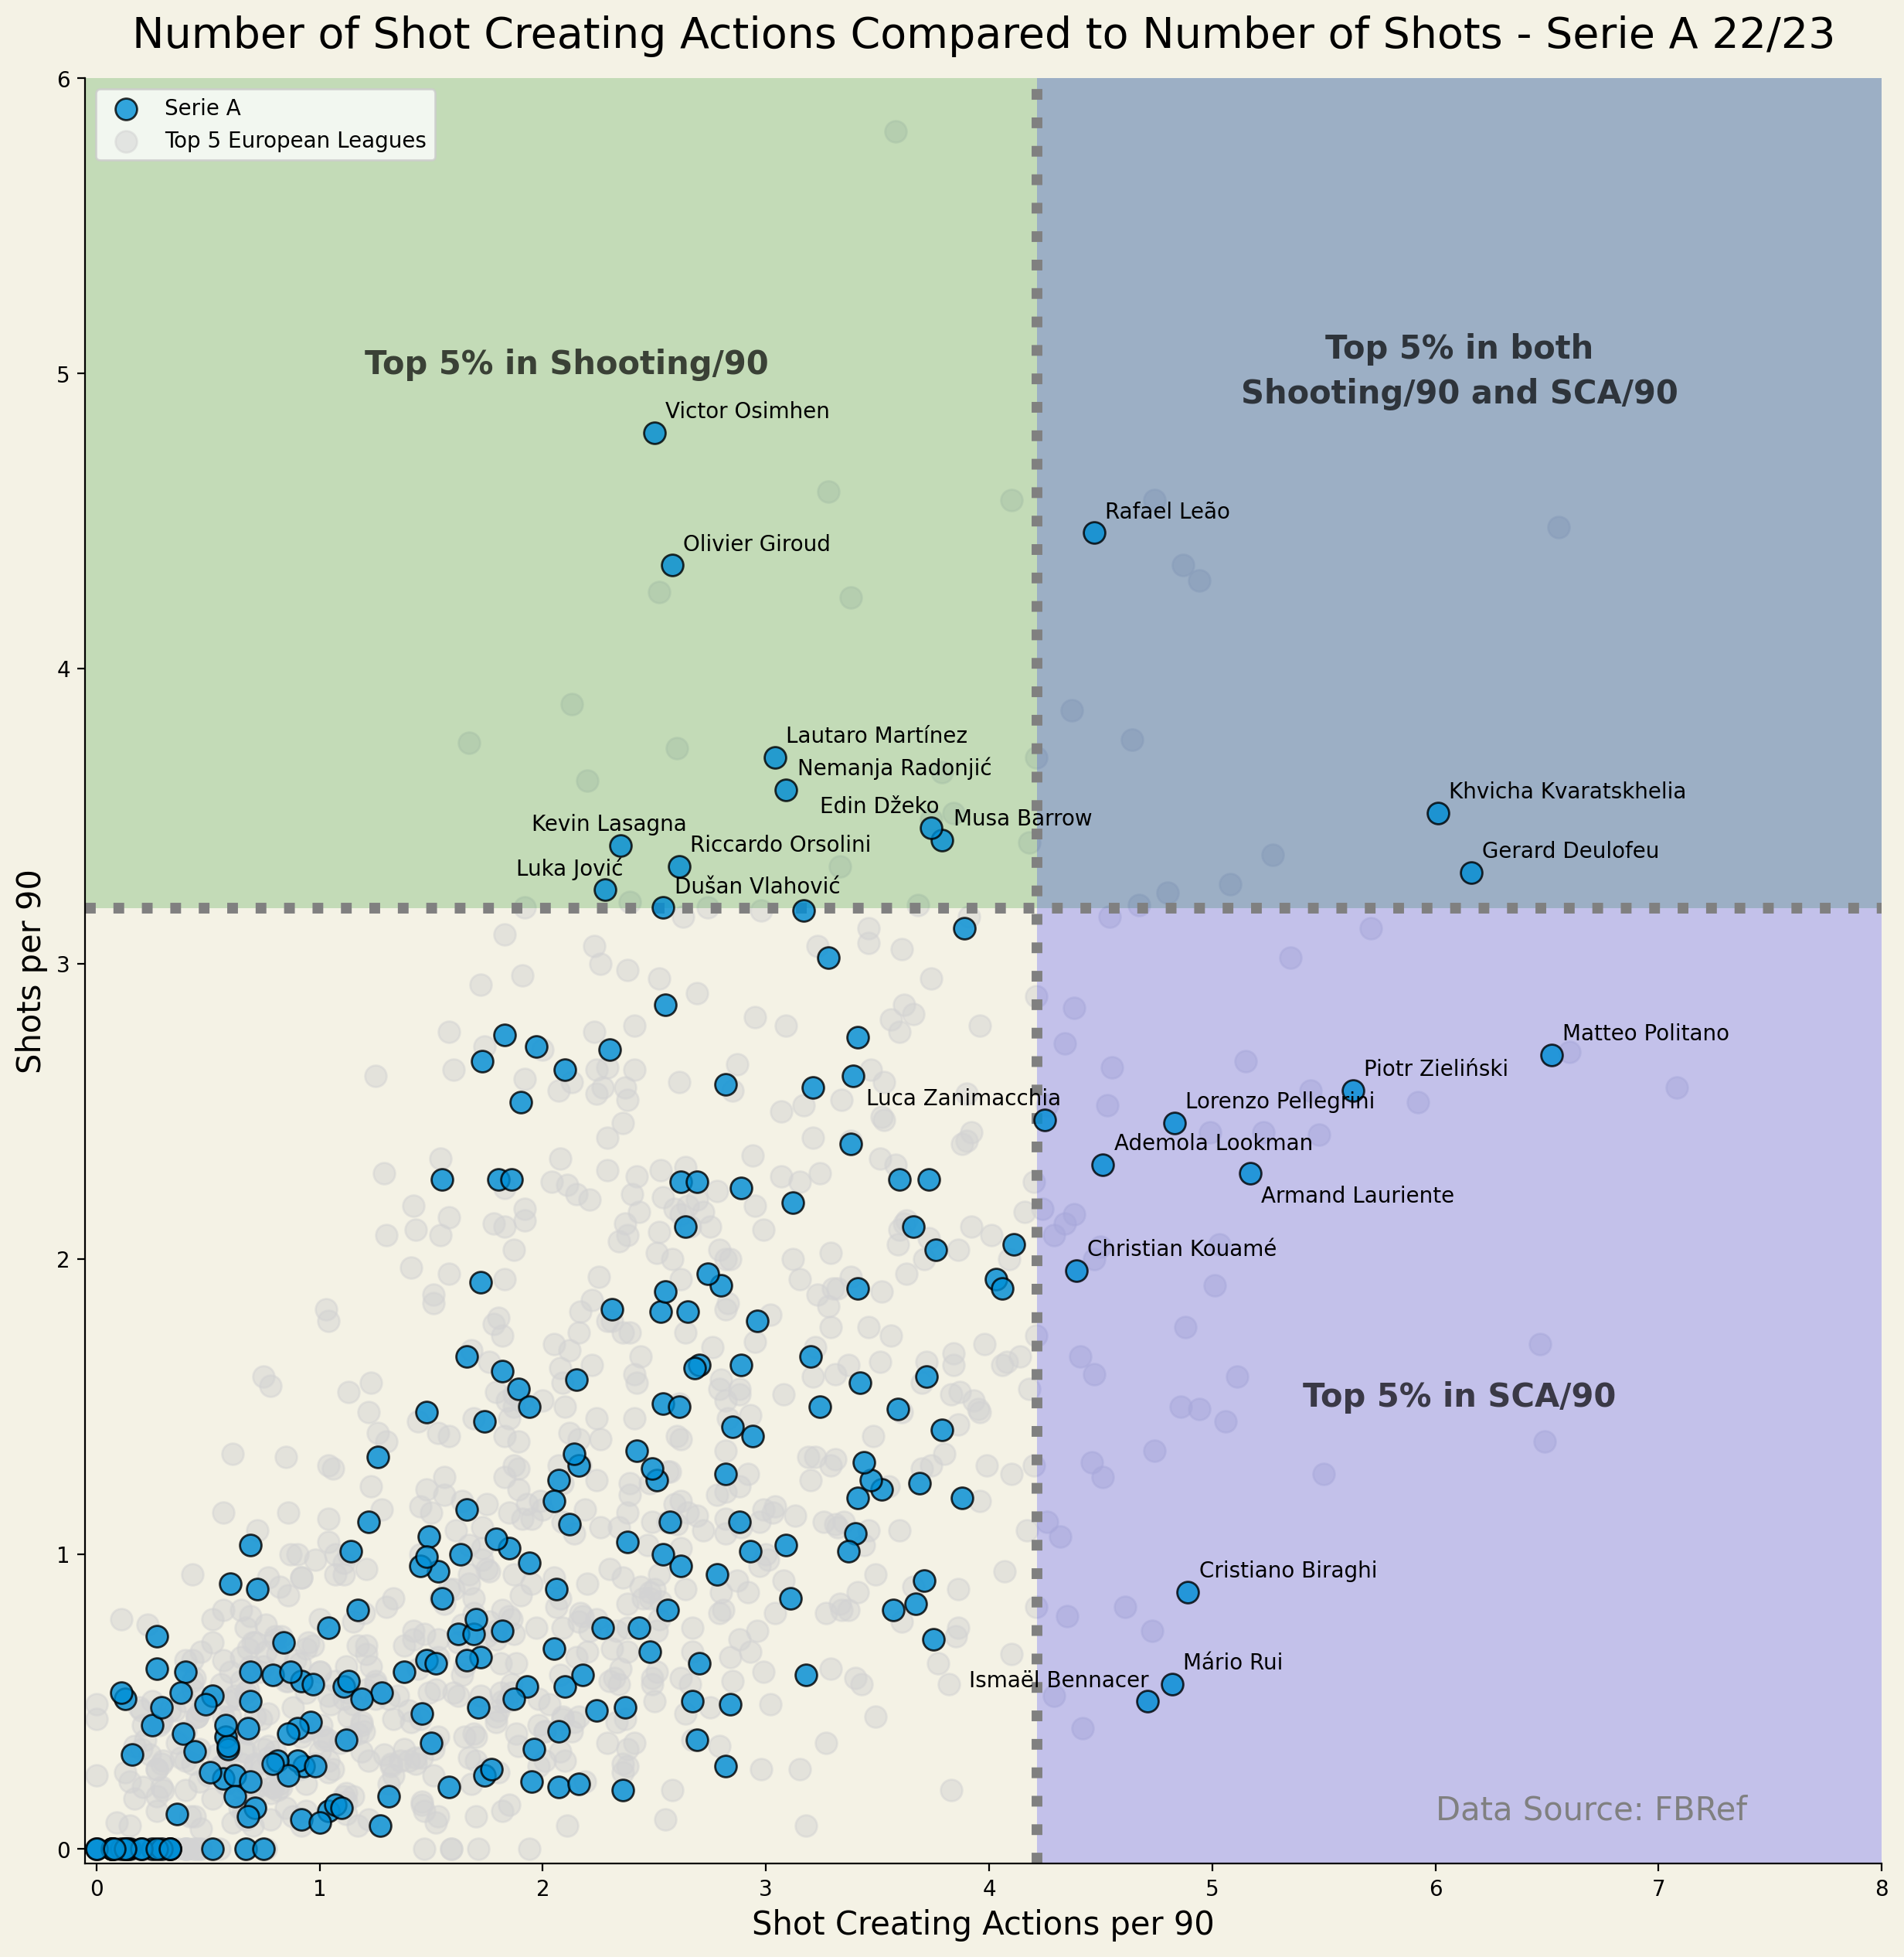

In [240]:
## Serie A

plt.figure(figsize = (15,15), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim([-0.05, 6])
plt.xlim([-0.05, 8])

plt.title("Number of Shot Creating Actions Compared to Number of Shots - Serie A 22/23", fontsize = 20, y = 1.01) 

ax.set_xlabel("Shot Creating Actions per 90", fontsize = 15)
ax.set_ylabel("Shots per 90", fontsize = 15)

ax.scatter(df_ita['SCA90'], df_ita['Sht90'], s = 100, c = "#008fd7", ec = "black", alpha = 0.8, label = "Serie A", zorder=3)
ax.scatter(df['SCA90'], df['Sht90'], s = 100, c = "lightgrey", alpha = 0.5, label = "Top 5 European Leagues")

ax.axvline(df_ita['SCA90'].quantile(0.95), ls=":", linewidth=5, color="grey")
ax.axhline(df_ita['Sht90'].quantile(0.95), ls=":", linewidth=5, color="grey")

ax.axhspan(df_ita['Sht90'].quantile(0.95), 6, facecolor='green', alpha=0.2)
ax.axvspan(df_ita['SCA90'].quantile(0.95), 8, facecolor="blue", alpha=0.2)

for i in range(len(df_ita)):
    if df_ita['Player'][i] == "Kevin Lasagna":
        ax.text(df_ita['SCA90'][i] - 0.40, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])
    elif df_ita['Player'][i] == "Luka Jović":
        ax.text(df_ita['SCA90'][i] - 0.40, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])
    elif df_ita['Player'][i] == "Ismaël Bennacer":
        ax.text(df_ita['SCA90'][i] - 0.80, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])
    elif df_ita['Player'][i] == "Luca Zanimacchia":
        ax.text(df_ita['SCA90'][i] - 0.80, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])
    elif df_ita['Player'][i] == "Armand Lauriente":
        ax.text(df_ita['SCA90'][i] + 0.05, df_ita['Sht90'][i] - 0.10, df_ita['Player'][i])
    elif df_ita['Player'][i] == "Edin Džeko":
        ax.text(df_ita['SCA90'][i] - 0.50, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])
    elif df_ita['SCA90'][i] > df_ita['SCA90'].quantile(0.95):
        ax.text(df_ita['SCA90'][i] + 0.05, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])
    elif df_ita['Sht90'][i] > df_ita['Sht90'].quantile(0.95):
        ax.text(df_ita['SCA90'][i] + 0.05, df_ita['Sht90'][i] + 0.05, df_ita['Player'][i])

ax.text(df_ita['SCA90'].quantile(0.95)/2, 5, "Top 5% in Shooting/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_ita['SCA90'].quantile(0.95))/2, 5.05, "Top 5% in both", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_ita['SCA90'].quantile(0.95))/2, 4.90, "Shooting/90 and SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_ita['SCA90'].quantile(0.95))/2, 1.5, "Top 5% in SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")     
        
ax.text(6, 0.1, "Data Source: FBRef", fontsize=15, c="grey")    

ax.legend(loc="upper left")

plt.show()

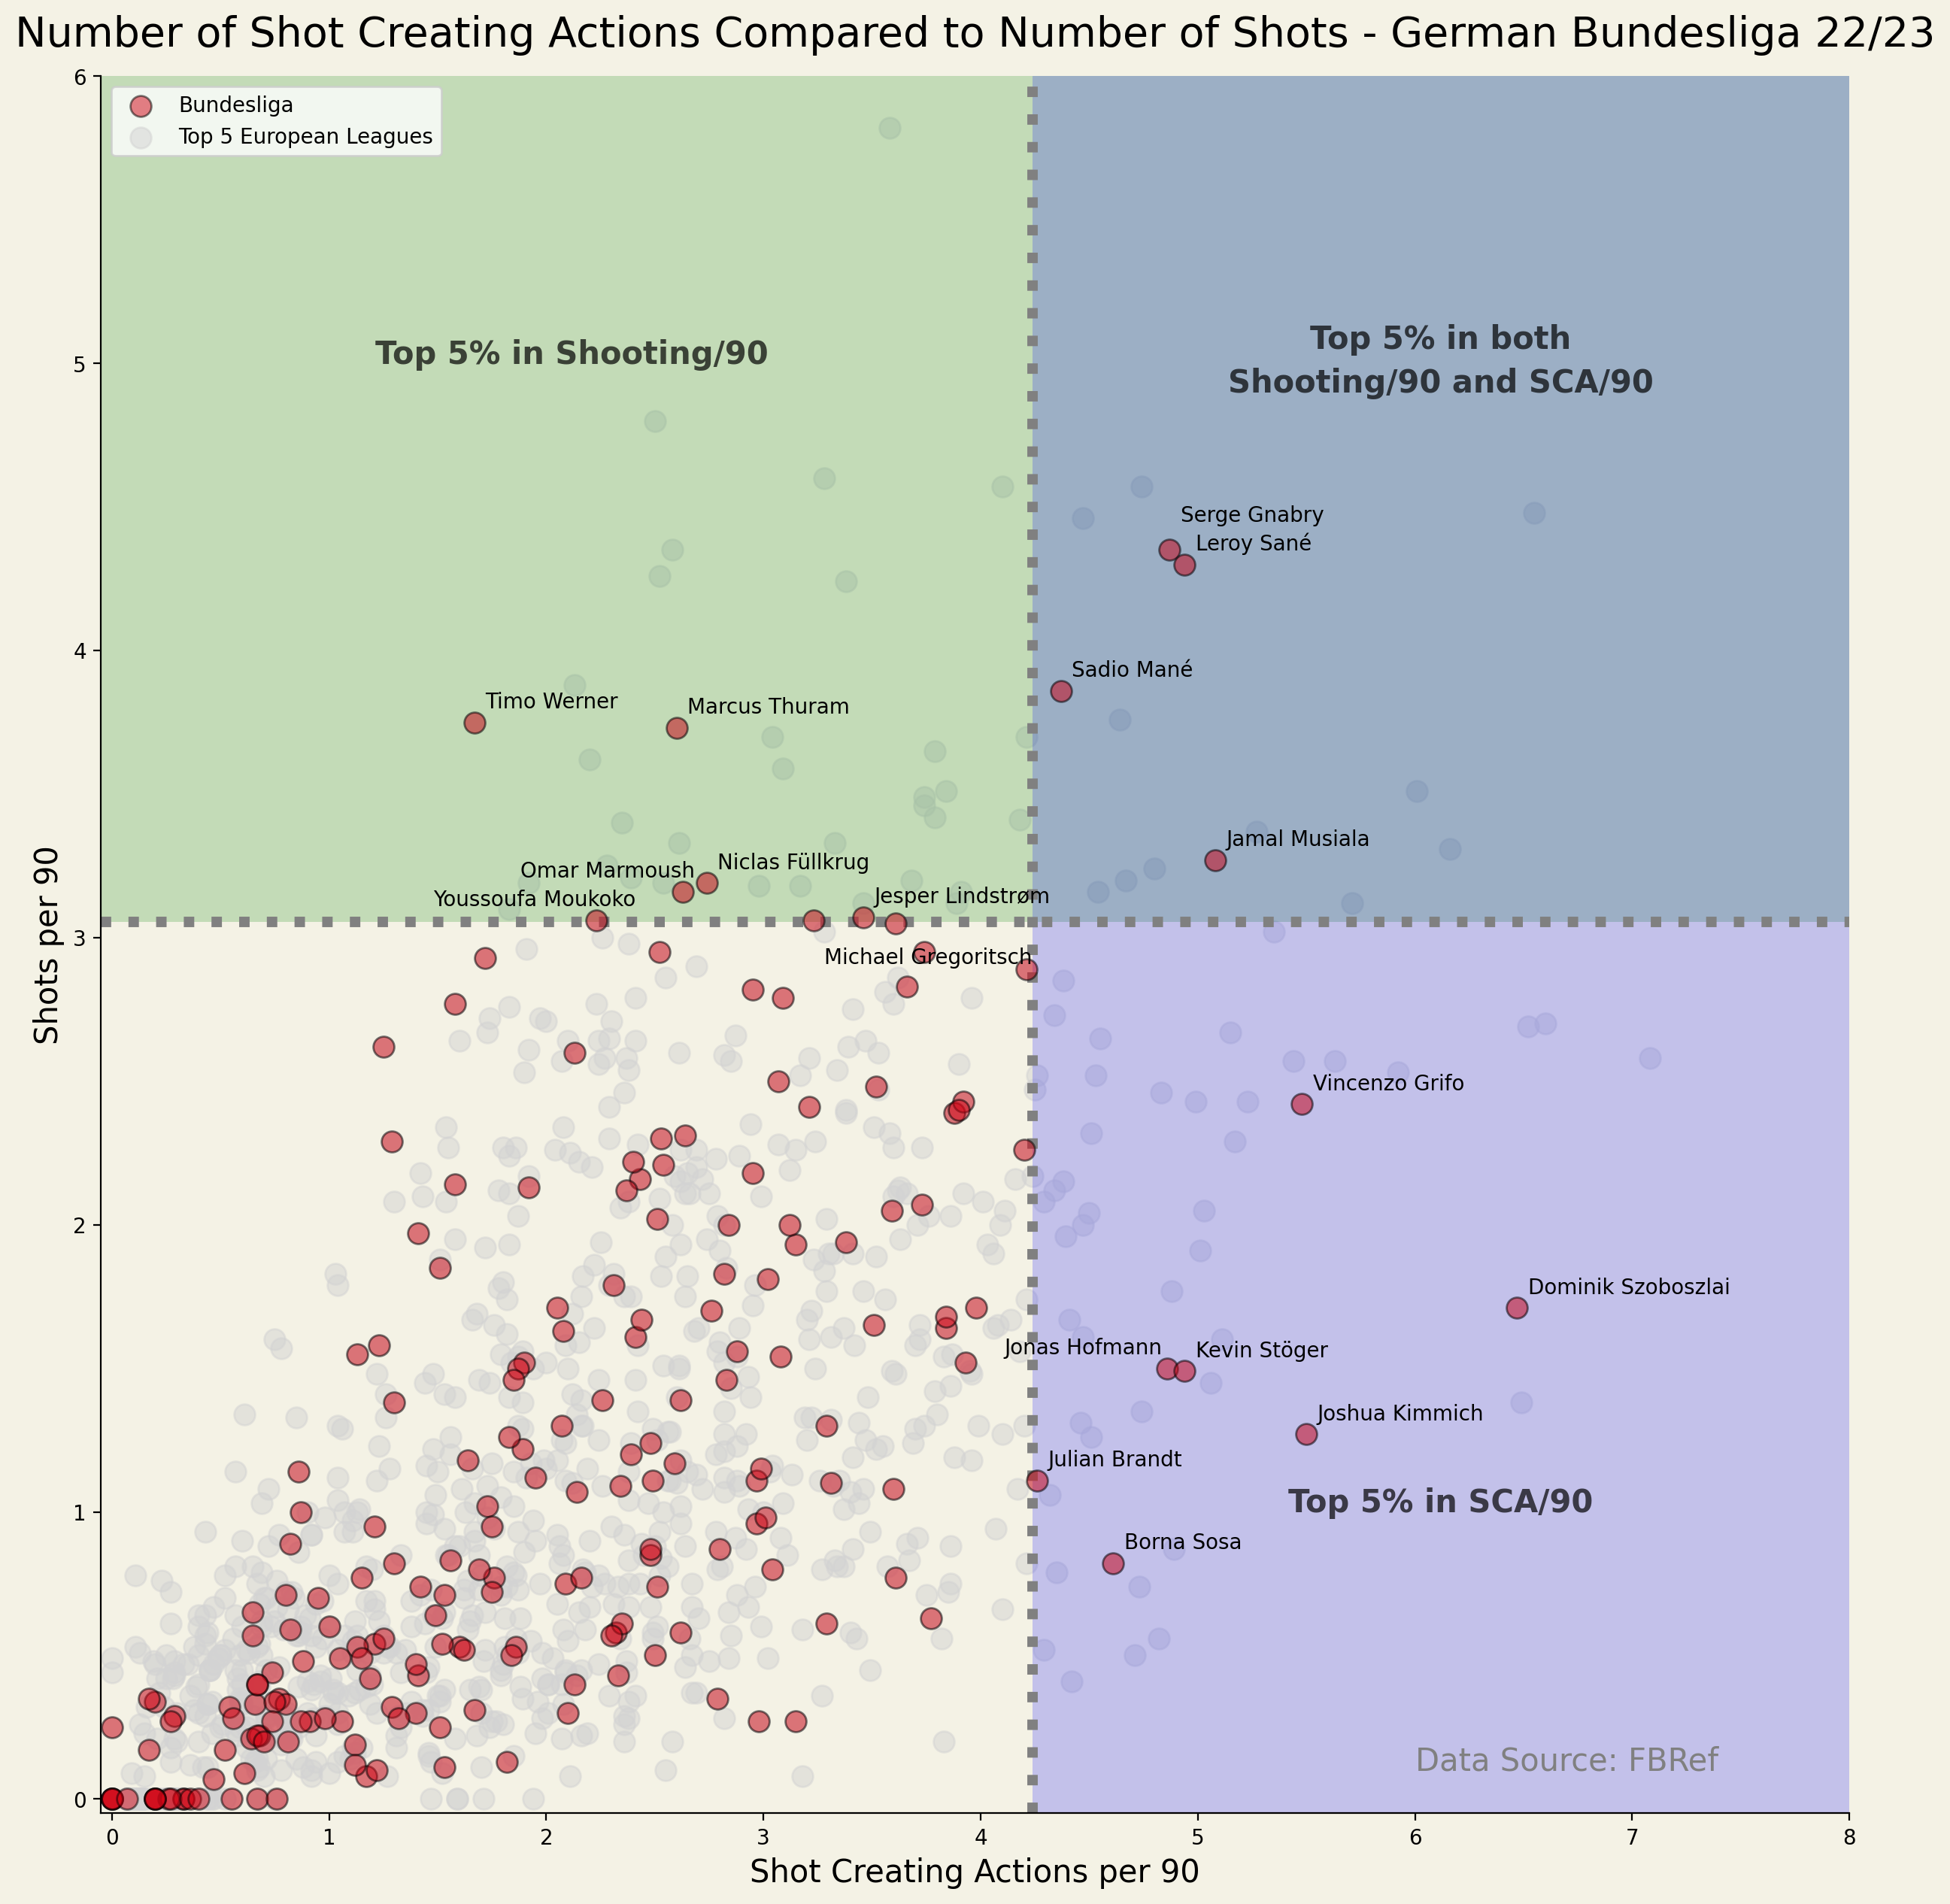

In [241]:
## Bundesliga

plt.figure(figsize = (15,15), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim([-0.05, 6])
plt.xlim([-0.05, 8])

plt.title("Number of Shot Creating Actions Compared to Number of Shots - German Bundesliga 22/23", fontsize = 20, y = 1.01) 

ax.set_xlabel("Shot Creating Actions per 90", fontsize = 15)
ax.set_ylabel("Shots per 90", fontsize = 15)

ax.scatter(df_ger['SCA90'], df_ger['Sht90'], s = 100, c = "#d20515", ec = "black", alpha = 0.5, label = "Bundesliga", zorder=3)
ax.scatter(df['SCA90'], df['Sht90'], s = 100, c = "lightgrey", alpha = 0.5, label = "Top 5 European Leagues")

ax.axvline(df_ger['SCA90'].quantile(0.95), ls=":", linewidth=5, color="grey")
ax.axhline(df_ger['Sht90'].quantile(0.95), ls=":", linewidth=5, color="grey")

ax.axhspan(df_ger['Sht90'].quantile(0.95), 6, facecolor='green', alpha=0.2)
ax.axvspan(df_ger['SCA90'].quantile(0.95), 8, facecolor="blue", alpha=0.2)

for i in range(len(df_ger)):
    if df_ger['Player'][i] == "Jonas Hofmann":
        ax.text(df_ger['SCA90'][i] - 0.75, df_ger['Sht90'][i] + 0.05, df_ger['Player'][i])
    elif df_ger['Player'][i] == "Omar Marmoush":
        ax.text(df_ger['SCA90'][i] - 0.75, df_ger['Sht90'][i] + 0.05, df_ger['Player'][i])
    elif df_ger['Player'][i] == "Youssoufa Moukoko":
        ax.text(df_ger['SCA90'][i] - 0.75, df_ger['Sht90'][i] + 0.05, df_ger['Player'][i])
    elif df_ger['Player'][i] == "Serge Gnabry":
        ax.text(df_ger['SCA90'][i] + 0.05, df_ger['Sht90'][i] + 0.10, df_ger['Player'][i])
    elif df_ger['Player'][i] == "Michael Gregoritsch":
        ax.text(df_ger['SCA90'][i] + 0.05, df_ger['Sht90'][i] - 0.15, df_ger['Player'][i])
    elif df_ger['SCA90'][i] > df_ger['SCA90'].quantile(0.95):
        ax.text(df_ger['SCA90'][i] + 0.05, df_ger['Sht90'][i] + 0.05, df_ger['Player'][i])
    elif df_ger['Sht90'][i] > df_ger['Sht90'].quantile(0.95):
        ax.text(df_ger['SCA90'][i] + 0.05, df_ger['Sht90'][i] + 0.05, df_ger['Player'][i])

ax.text(df_ger['SCA90'].quantile(0.95)/2, 5, "Top 5% in Shooting/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_ger['SCA90'].quantile(0.95))/2, 5.05, "Top 5% in both", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_ger['SCA90'].quantile(0.95))/2, 4.90, "Shooting/90 and SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_ger['SCA90'].quantile(0.95))/2, 1, "Top 5% in SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")     

ax.text(6, 0.1, "Data Source: FBRef", fontsize=15, c="grey")

ax.legend(loc="upper left")

plt.show()

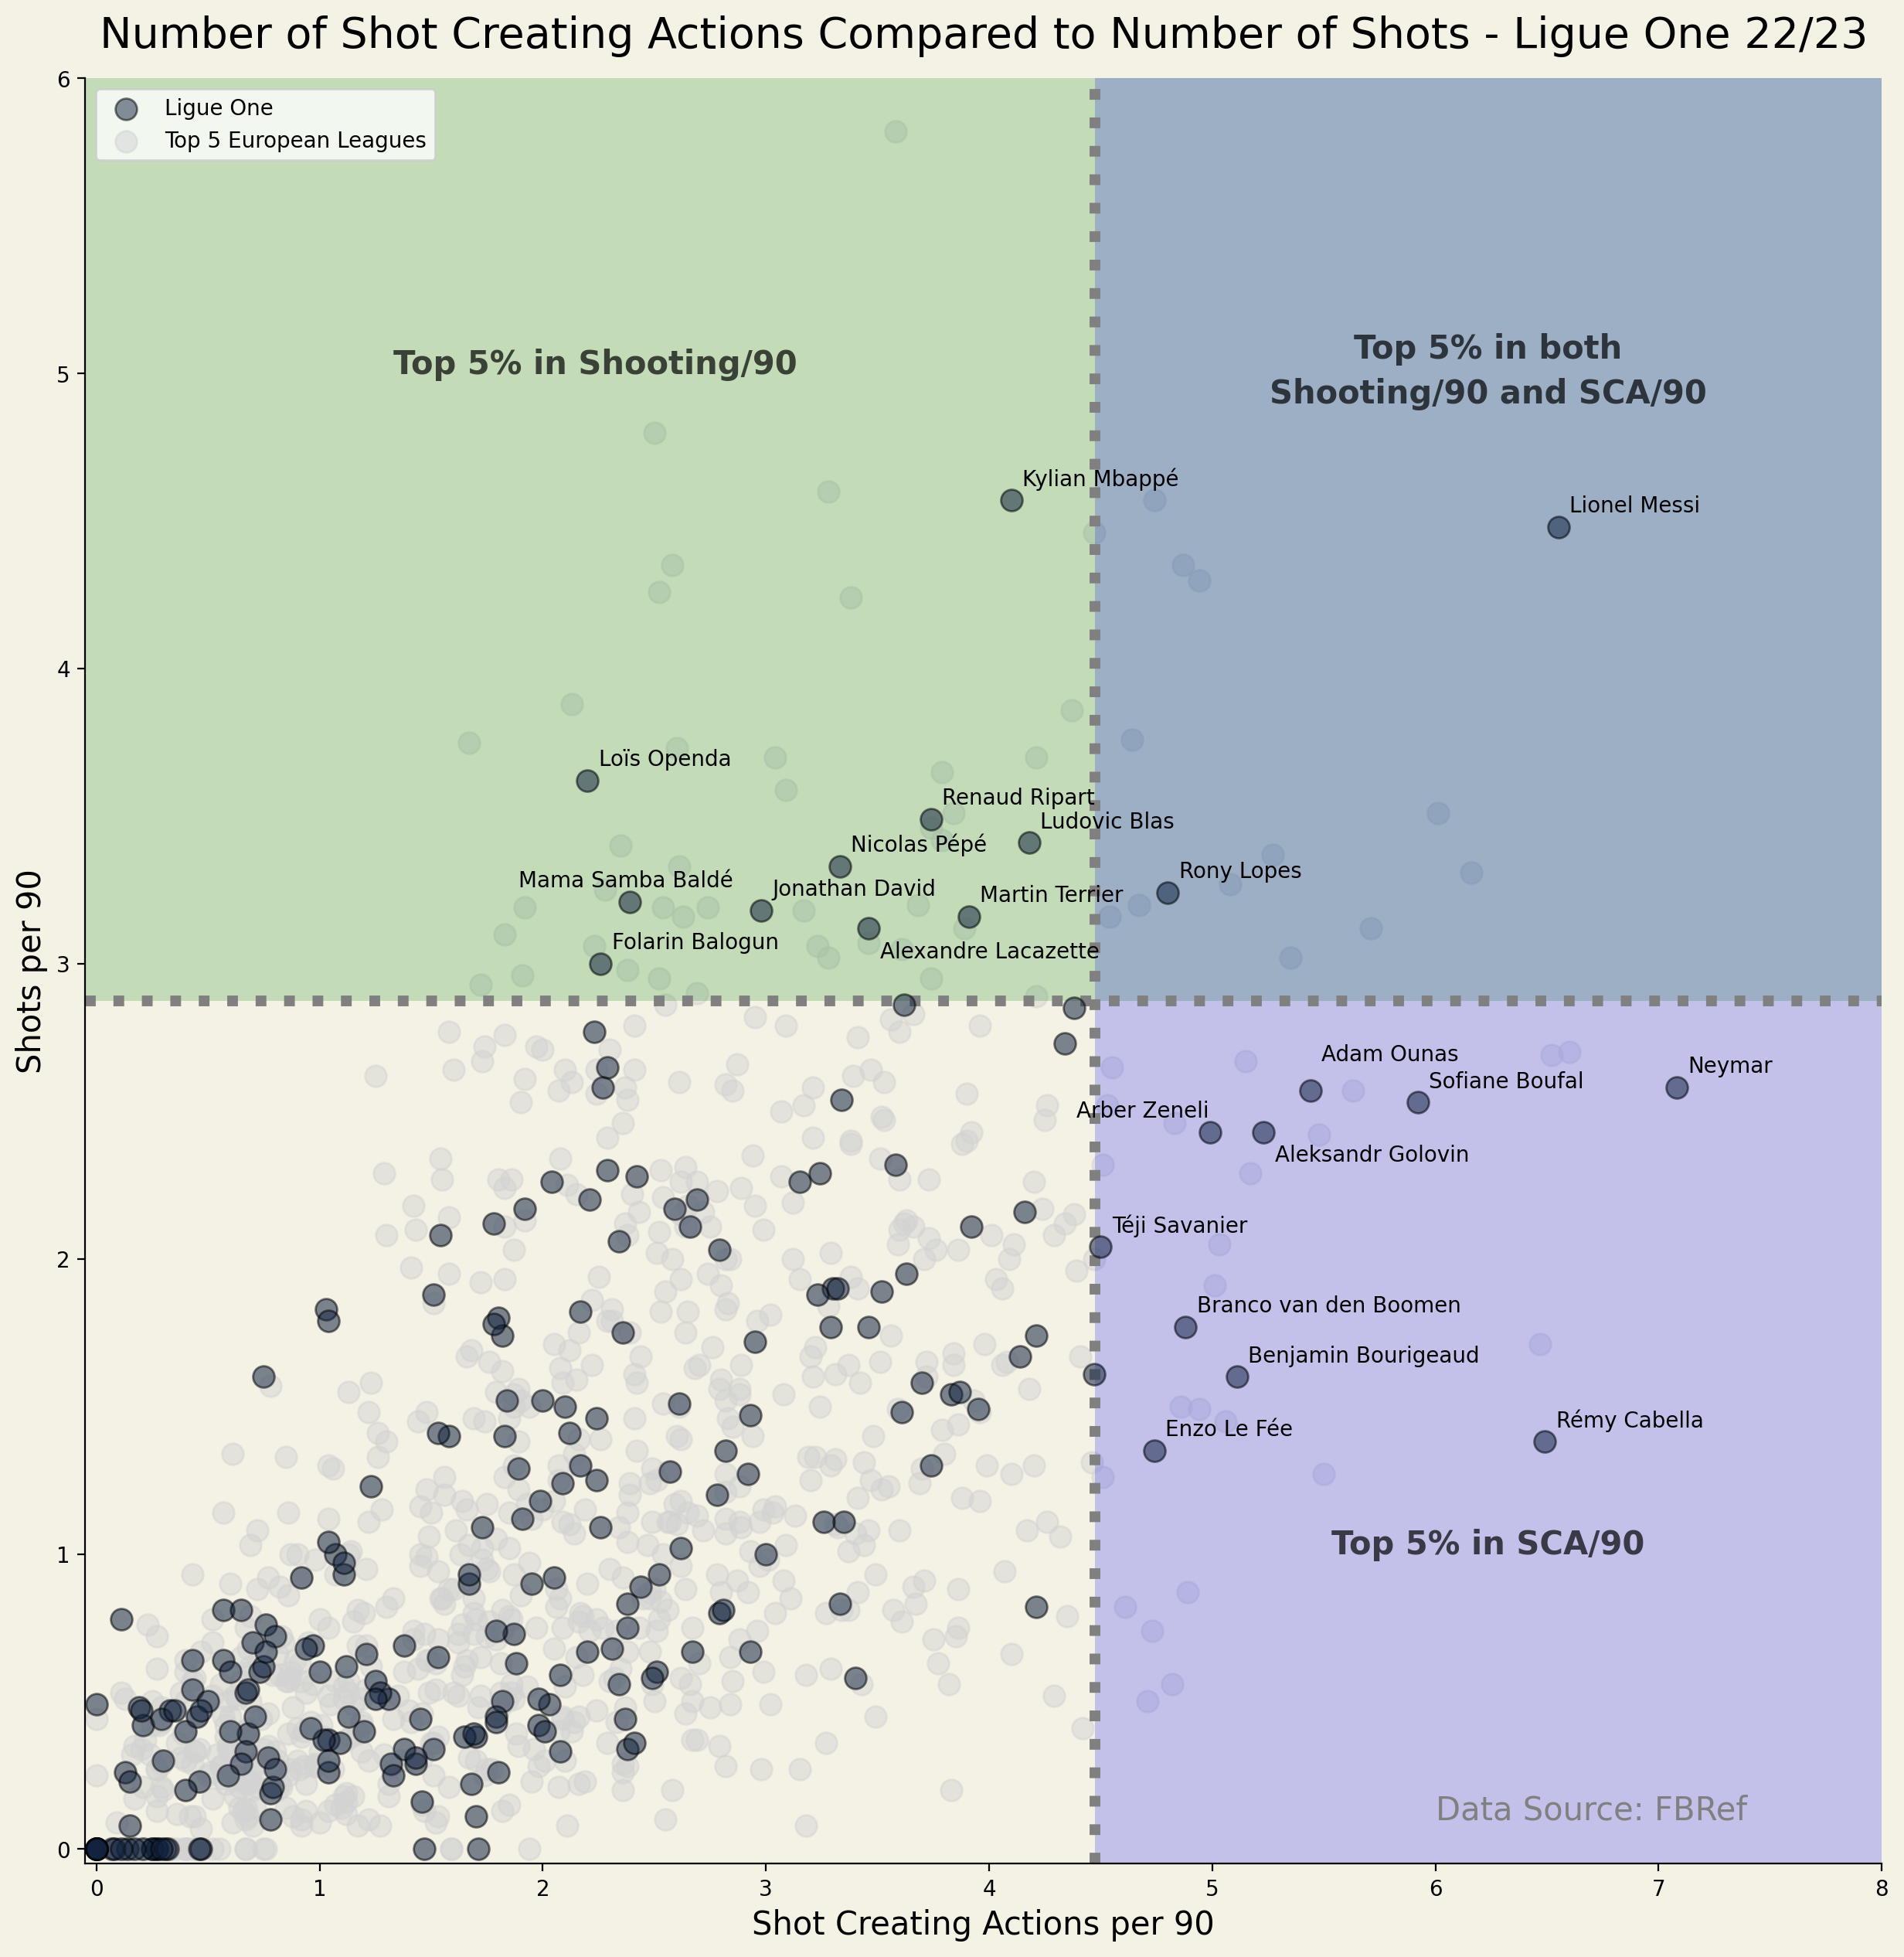

In [242]:
## Ligue 1

plt.figure(figsize = (15,15), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim([-0.05, 6])
plt.xlim([-0.05, 8])

ax.set_xlabel("Shot Creating Actions per 90", fontsize = 15)
ax.set_ylabel("Shots per 90", fontsize = 15)

plt.title("Number of Shot Creating Actions Compared to Number of Shots - Ligue One 22/23", fontsize = 20, y = 1.01) 

ax.scatter(df_fra['SCA90'], df_fra['Sht90'], s = 100, c = "#12233f", ec = "black", alpha = 0.5, label = "Ligue One", zorder=3)
ax.scatter(df['SCA90'], df['Sht90'], s = 100, c = "lightgrey", alpha = 0.5, label = "Top 5 European Leagues")

ax.axvline(df_fra['SCA90'].quantile(0.95), ls=":", linewidth=5, color="grey")
ax.axhline(df_fra['Sht90'].quantile(0.95), ls=":", linewidth=5, color="grey")

ax.axhspan(df_fra['Sht90'].quantile(0.95), 6, facecolor='green', alpha=0.2)
ax.axvspan(df_fra['SCA90'].quantile(0.95), 8, facecolor="blue", alpha=0.2)

for i in range(len(df_fra)):
    if df_fra['Player'][i] == "Mama Samba Baldé":
        ax.text(df_fra['SCA90'][i] - 0.50, df_fra['Sht90'][i] + 0.05, df_fra['Player'][i])
    elif df_fra['Player'][i] == "Alexandre Lacazette":
        ax.text(df_fra['SCA90'][i] + 0.05, df_fra['Sht90'][i] - 0.10, df_fra['Player'][i])
    elif df_fra['Player'][i] == "Arber Zeneli":
        ax.text(df_fra['SCA90'][i] - 0.60, df_fra['Sht90'][i] + 0.05, df_fra['Player'][i])
    elif df_fra['Player'][i] == "Adam Ounas":
        ax.text(df_fra['SCA90'][i] + 0.05, df_fra['Sht90'][i] + 0.10, df_fra['Player'][i])
    elif df_fra['Player'][i] == "Aleksandr Golovin":
        ax.text(df_fra['SCA90'][i] + 0.05, df_fra['Sht90'][i] - 0.10, df_fra['Player'][i])
    elif df_fra['SCA90'][i] > df_fra['SCA90'].quantile(0.95):
        ax.text(df_fra['SCA90'][i] + 0.05, df_fra['Sht90'][i] + 0.05, df_fra['Player'][i])
    elif df_fra['Sht90'][i] > df_fra['Sht90'].quantile(0.95):
        ax.text(df_fra['SCA90'][i] + 0.05, df_fra['Sht90'][i] + 0.05, df_fra['Player'][i])

ax.text(df_fra['SCA90'].quantile(0.95)/2, 5, "Top 5% in Shooting/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_fra['SCA90'].quantile(0.95))/2, 5.05, "Top 5% in both", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_fra['SCA90'].quantile(0.95))/2, 4.90, "Shooting/90 and SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_fra['SCA90'].quantile(0.95))/2, 1, "Top 5% in SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")     
                
ax.text(6, 0.1, "Data Source: FBRef", fontsize=15, c="grey")
    
ax.legend(loc="upper left")

plt.show()

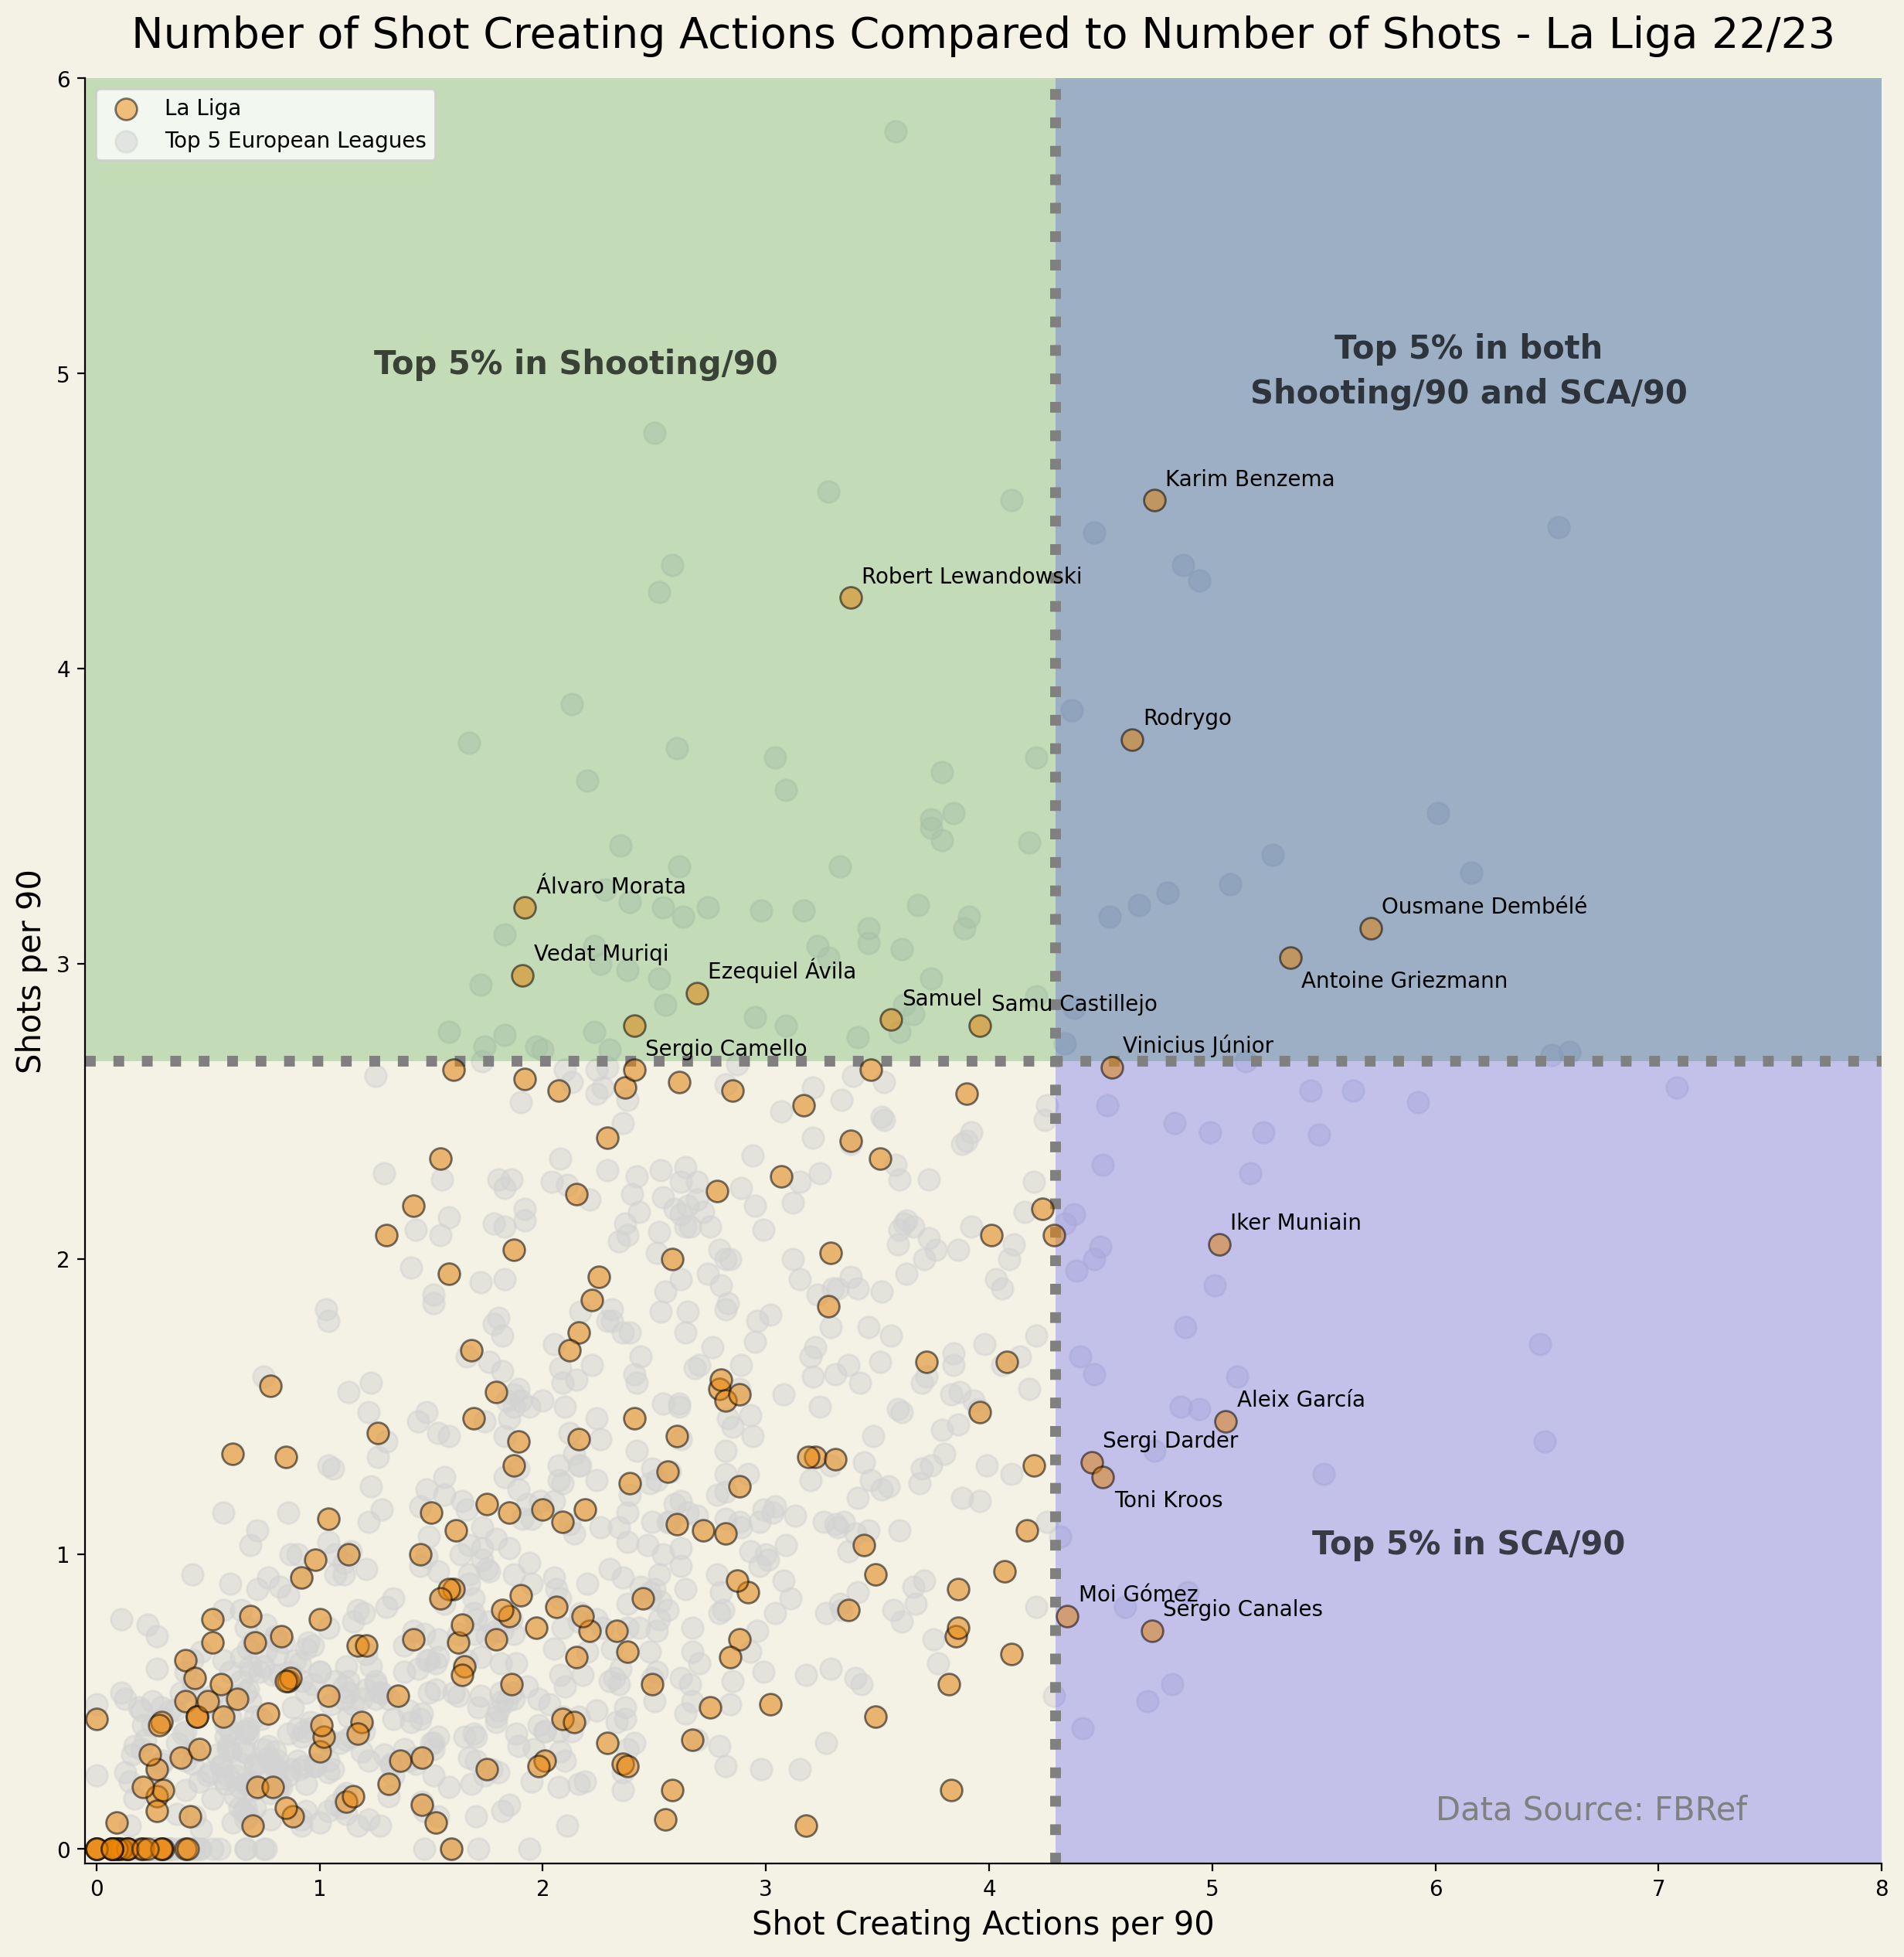

In [243]:
## La Liga

plt.figure(figsize = (15,15), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim([-0.05, 6])
plt.xlim([-0.05, 8])

ax.set_xlabel("Shot Creating Actions per 90", fontsize = 15)
ax.set_ylabel("Shots per 90", fontsize = 15)

plt.title("Number of Shot Creating Actions Compared to Number of Shots - La Liga 22/23", fontsize = 20, y = 1.01) 

ax.scatter(df_esp['SCA90'], df_esp['Sht90'], s = 100, c = "#ee8707", ec = "black", alpha = 0.5, label = "La Liga", zorder=3)
ax.scatter(df['SCA90'], df['Sht90'], s = 100, c = "lightgrey", alpha = 0.5, label = "Top 5 European Leagues")

ax.axvline(df_esp['SCA90'].quantile(0.95), ls=":", linewidth=5, color="grey")
ax.axhline(df_esp['Sht90'].quantile(0.95), ls=":", linewidth=5, color="grey")

ax.axhspan(df_esp['Sht90'].quantile(0.95), 6, facecolor='green', alpha=0.2)
ax.axvspan(df_esp['SCA90'].quantile(0.95), 8, facecolor="blue", alpha=0.2)

for i in range(len(df_esp)):
    if df_esp['Player'][i] == "Toni Kroos":
        ax.text(df_esp['SCA90'][i] + 0.05, df_esp['Sht90'][i] - 0.10, df_esp['Player'][i])
    elif df_esp['Player'][i] == "Sergio Camello":
        ax.text(df_esp['SCA90'][i] + 0.05, df_esp['Sht90'][i] - 0.10, df_esp['Player'][i])
    elif df_esp['Player'][i] == "Antoine Griezmann":
        ax.text(df_esp['SCA90'][i] + 0.05, df_esp['Sht90'][i] - 0.10, df_esp['Player'][i])
    elif df_esp['SCA90'][i] > df_esp['SCA90'].quantile(0.95):
        ax.text(df_esp['SCA90'][i] + 0.05, df_esp['Sht90'][i] + 0.05, df_esp['Player'][i])
    elif df_esp['Sht90'][i] > df_esp['Sht90'].quantile(0.95):
        ax.text(df_esp['SCA90'][i] + 0.05, df_esp['Sht90'][i] + 0.05, df_esp['Player'][i])

ax.text(df_esp['SCA90'].quantile(0.95)/2, 5, "Top 5% in Shooting/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_esp['SCA90'].quantile(0.95))/2, 5.05, "Top 5% in both", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_esp['SCA90'].quantile(0.95))/2, 4.90, "Shooting/90 and SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")
ax.text(8 - (8-df_esp['SCA90'].quantile(0.95))/2, 1, "Top 5% in SCA/90", fontsize=15, fontweight="bold", color="black", alpha=0.7, horizontalalignment="center")          
    
ax.text(6, 0.1, "Data Source: FBRef", fontsize=15, c="grey")    

ax.legend(loc="upper left")

plt.show()